In [38]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
plt.style.use('dark_background')

def evaluate(path, wandb_name, title=None, save_path=None):
    api = wandb.Api()
    run = api.run(wandb_name)
    run_history=run.history()
    config = pd.DataFrame(json.loads(run.json_config)).T['value']
    
    with open(path) as f:
        data = json.load(f)
    # dict_keys(['mean_loss', 'average_precision_score', 'confusion_matrix', 'roc', 'precision_recall_curve', 'det'])
    def get_confusion_matrix(data):
        cm_d = data['confusion_matrix'] # confusion matrix dict
        cm = pd.DataFrame([[cm_d['true_pos'], cm_d['false_neg']],
                           [cm_d['false_pos'], cm_d['true_neg']]],
                          index=['true','false'],
                          columns=['positive','negative'],
                         )
        return cm
    def get_roc(data):
        return pd.DataFrame(data['roc'])
    
    def plot_loss(run_history, ax):
        ax.plot(run_history['_step'],
                run_history['loss'],
                lw=1,
                alpha=0.5,
               )
        #ax.set_xticks(list(range(max(run_history['_step'])))[::10000],
        #              list(range(max(run_history['_step'])))[::10000],
        #             rotation=80)
                                     
        ax.set_xlabel('Step')
        ax.set_ylabel('Binary Cross Entropy Loss')
        ax.set_title('Training Loss')
    def plot_confusion_matrix(cm, ax):
        sns.heatmap(cm, ax=ax, annot=True)
        ax.set_title('Confusion Matrix')
    def plot_roc(roc, ax):
        ax.plot(roc['false_pos'],
                roc['true_pos'],
               )
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver Operator Curve (ROC)')
    def plot_precision_recall(precision_recall, ax):
        ax.plot(precision_recall['recall'],
                precision_recall['precision'],
                lw=1,
               )
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('Precision Recall Curve')
    def plot_det(det, ax):
        ax.plot(det['fpr'],
                det['fnr'],
                lw=1,
               )
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Detection Error Tradeoff (DET) Curve')
        
        
    mean_loss = data['mean_loss']
    average_precision_score = data['average_precision_score']
    cm = get_confusion_matrix(data)
    roc = get_roc(data)
    
    fig, ax = plt.subplots(3,2, figsize=(10,12))
    plot_loss(run_history, ax[0,0])
    plot_confusion_matrix(cm, ax[0,1])
    plot_roc(roc, ax[1,0])
    plot_precision_recall(data['precision_recall_curve'], ax[1,1])
    plot_det(data['det'], ax[2,0])
    ax[2,1].text( 0.1,0.5, f"Mean Loss : {round(data['mean_loss'],3)}\nAverage Precision Score : {round(data['average_precision_score'],3)}")
    ax[2,1].axis('off')
    ax[2,1].set_title('Evaluation Metrics')
    if title is None:
        fig.suptitle(f"Model evaluation for {run.name}")
    else:
        fig.suptitle(title)
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)
    plt.show()
    return config

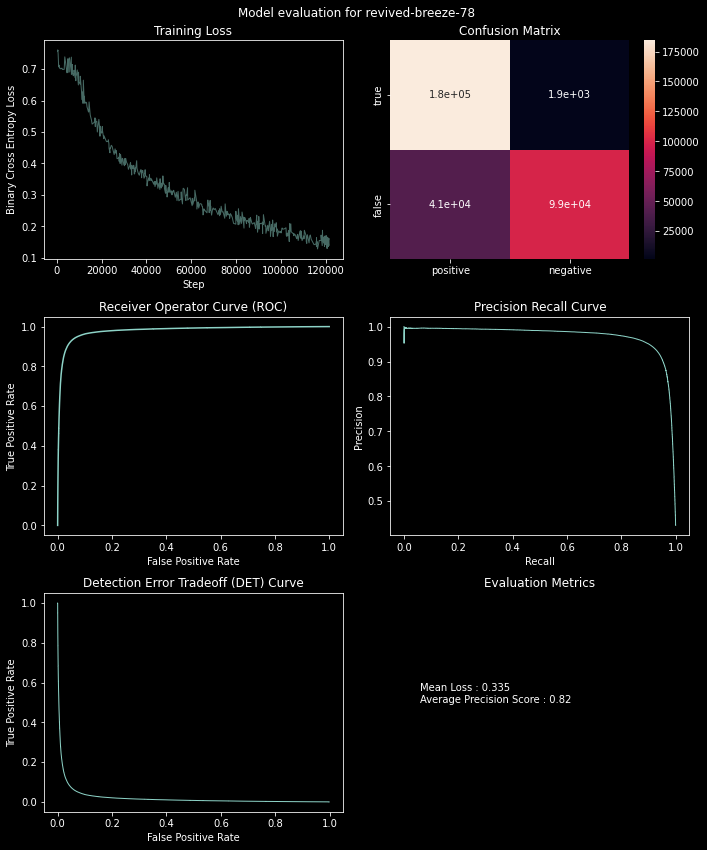

lr                                 0.00001
esm                      esm1_t6_43M_UR50S
cuda                                  True
load                                  None
test                                 False
input                   data/o3f.train.csv
wandb                                False
epochs                                32.0
batch_size                           128.0
emb_size_fp                          512.0
n_layers_fp                            4.0
stride_pool                            3.0
transformer                          False
lstm_hs_pool                        1024.0
emb_size_head                       2560.0
n_layers_head                          6.0
kernel_size_pool                       9.0
num_conv_layers_pool                   3.0
num_lstm_layers_pool                   2.0
Name: value, dtype: object

In [39]:
evaluate(path='../model/weights/revived-breeze-78/test.json', 
         wandb_name='jamesengleback/sxfst/runs/2hc5t41i',
         save_path='../docs/docs/img/revived-breeze-78-eval.png',
        )

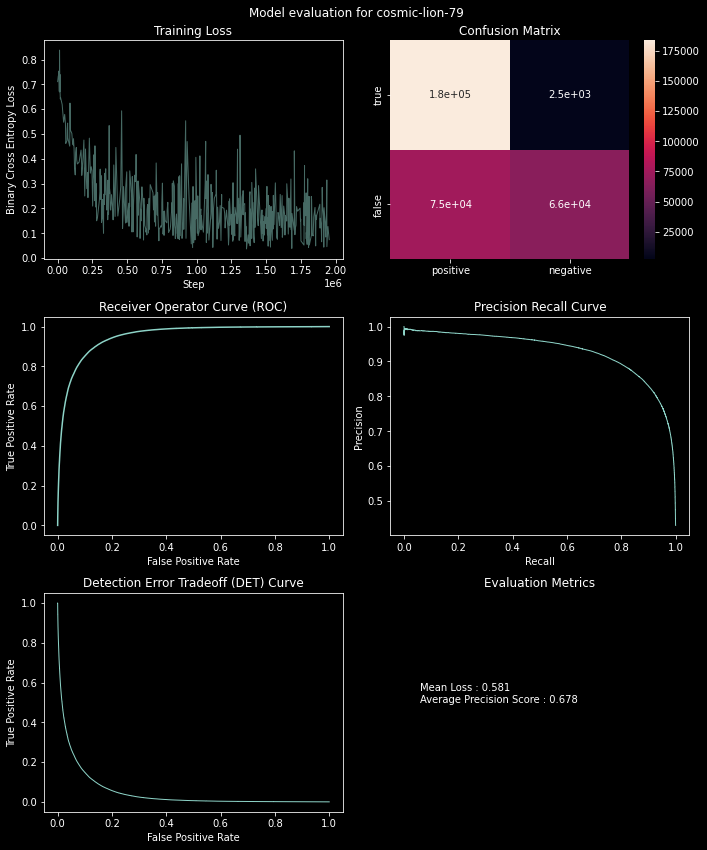

lr                                 0.00001
esm                      esm1_t6_43M_UR50S
cuda                                  True
load                                  None
test                                 False
input                   data/o3f.train.csv
wandb                                False
epochs                                32.0
batch_size                             8.0
emb_size_fp                          512.0
n_layers_fp                            4.0
stride_pool                            3.0
transformer                          False
lstm_hs_pool                        1024.0
emb_size_head                       2560.0
n_layers_head                          3.0
kernel_size_pool                       9.0
num_conv_layers_pool                   3.0
num_lstm_layers_pool                   2.0
Name: value, dtype: object

In [40]:
evaluate(path='../model/weights/cosmic-lion-79/val.json', 
         wandb_name='jamesengleback/sxfst/runs/2rg2005c',
         save_path='../docs/docs/img/cosmic-lion-79-eval.png',
        )

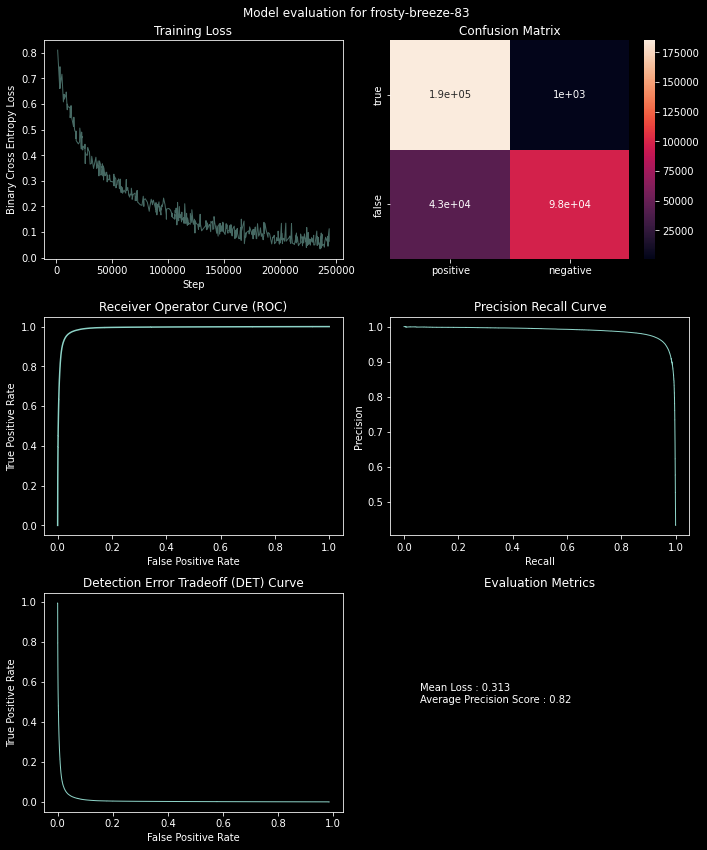

lr                                 0.00001
esm                      esm1_t6_43M_UR50S
cuda                                  True
load                                  None
test                                 False
input                   data/o3f.train.csv
wandb                                False
epochs                                32.0
batch_size                            64.0
emb_size_fp                          512.0
n_layers_fp                            4.0
stride_pool                            3.0
transformer                           True
lstm_hs_pool                        1024.0
emb_size_head                       2560.0
n_layers_head                          3.0
kernel_size_pool                       9.0
num_conv_layers_pool                   3.0
num_lstm_layers_pool                   2.0
Name: value, dtype: object

In [41]:
evaluate(path='../model/weights/frosty-breeze-83/val.json', 
         wandb_name='jamesengleback/sxfst/runs/3h3z2c4q',
         save_path='../docs/docs/img/frosty-breeze-83-eval.png',
        )

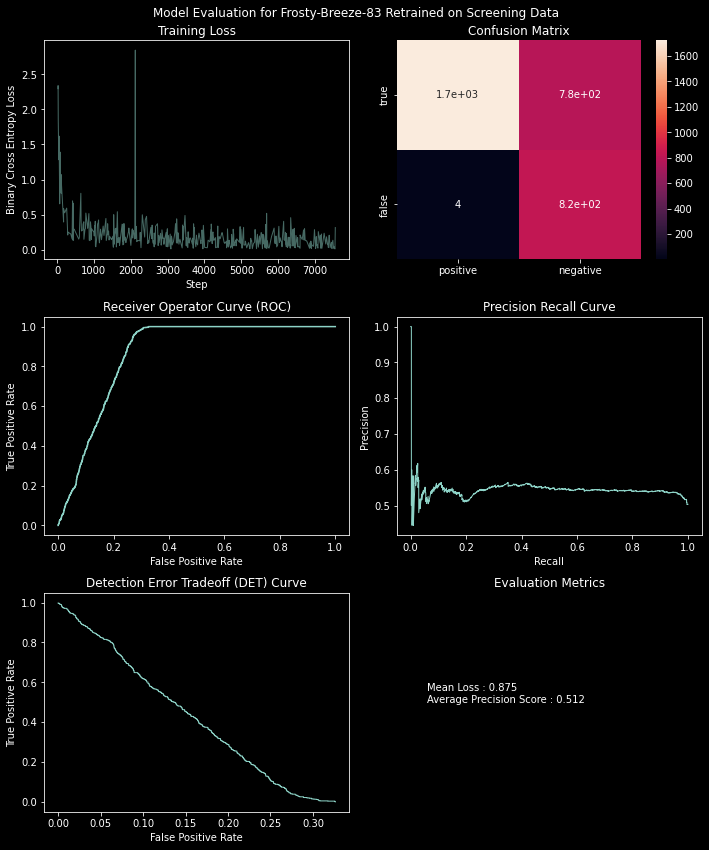

lr                                                            0.00001
esm                                                 esm1_t6_43M_UR50S
cuda                                                             True
load                    weights/floral-wave-85/floral-wave-85_e63.pkl
test                                                            False
input                                   data/screening-data.train.csv
wandb                                                           False
epochs                                                           64.0
batch_size                                                       32.0
emb_size_fp                                                     128.0
n_layers_fp                                                       3.0
stride_pool                                                       3.0
transformer                                                     False
lstm_hs_pool                                                     32.0
emb_size_head       

In [42]:
evaluate(path='../model/weights/frosty-breeze-83-retrained/vivid-blaze-91/val.json', 
         wandb_name='jamesengleback/sxfst/runs/3svltvhv',
         title='Model Evaluation for Frosty-Breeze-83 Retrained on Screening Data - Vivid-Breeze-91',
         save_path='../docs/docs/img/frosty-breeze-83-vivid-breeze-91-eval.png',
        )

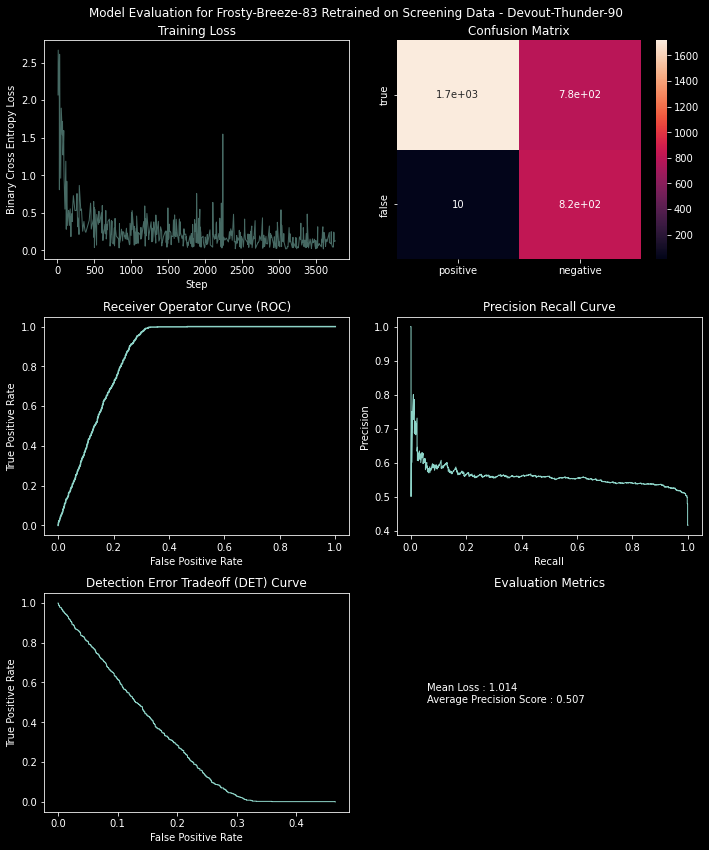

lr                                                            0.00001
esm                                                 esm1_t6_43M_UR50S
cuda                                                             True
load                    weights/floral-wave-85/floral-wave-85_e63.pkl
test                                                            False
input                                   data/screening-data.train.csv
wandb                                                           False
epochs                                                           32.0
batch_size                                                       32.0
emb_size_fp                                                     128.0
n_layers_fp                                                       3.0
stride_pool                                                       3.0
transformer                                                     False
lstm_hs_pool                                                     32.0
emb_size_head       

In [43]:
evaluate(path='../model/weights/frosty-breeze-83-retrained/devout-thunder-90/val.json', 
         wandb_name='jamesengleback/sxfst/runs/31ony010',
         title='Model Evaluation for Frosty-Breeze-83 Retrained on Screening Data - Devout-Thunder-90',
         save_path='../docs/docs/img/frosty-breeze-83-vivid-breeze-91-devout-thunder-90-eval.png',
        )

## Sequence optimization

In [ ]:
df = pd.read_csv('../model/seq-opt.csv')

#sns.kdeplot(df['generation'], df['score'])
plt.scatter(df['generation'], 
            df['score'],
            s=0.4,
           alpha=0.1,
           )
plt.xlabel('generation')
plt.ylabel('Predicted Mesotrione Binding Likelihood')
plt.show()

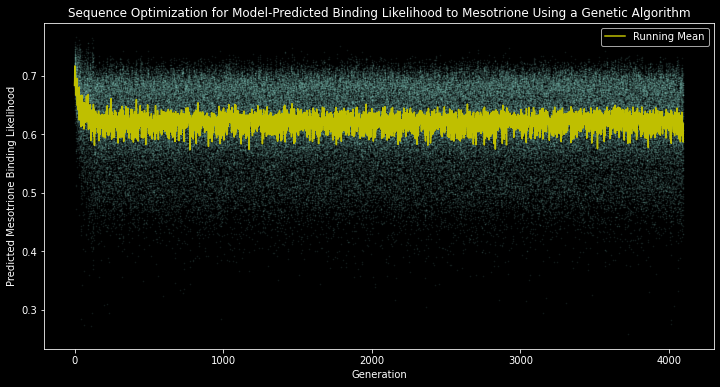

In [48]:
running_mean_score = {}

for i in df['generation'].unique():
    chunk = df.loc[df['generation'] == i, :]
    running_mean_score[i] = chunk['score'].mean()
    
running_mean_score = pd.Series(running_mean_score)

plt.figure(figsize=(12,6))
plt.scatter(df['generation'], 
            df['score'],
            s=0.4,
           alpha=0.1,
            
           )
plt.plot(running_mean_score, c='y', label='Running Mean')
plt.xlabel('Generation')
plt.ylabel('Predicted Mesotrione Binding Likelihood')
plt.legend()
plt.title('Sequence Optimization for Model-Predicted Binding Likelihood to Mesotrione Using a Genetic Algorithm')
plt.show()

/home/u0/miniconda3/envs/sxfst/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: 

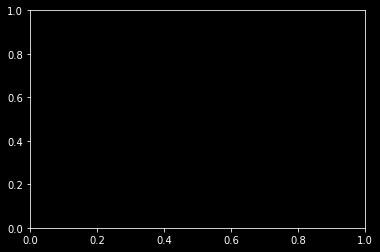

In [49]:
# really slow
#sns.kdeplot(df['generation'], df['score'])
#plt.xlabel('generation')
#plt.ylabel('Predicted Mesotrione Binding Likelihood')
#plt.show()